In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  #for plots and graphs
from sklearn.preprocessing import LabelEncoder   #to change text to numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score  #making model 5 times to check accuracy

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Desktop\Imarticus\linear_regression\Student_Performance.csv')

In [3]:
df.sample(4)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4898,6,88,No,7,5,76.0
9384,5,54,No,8,2,40.0
182,1,95,No,8,6,72.0
8461,2,60,Yes,8,0,36.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# df.describe()

## EDA Homework

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

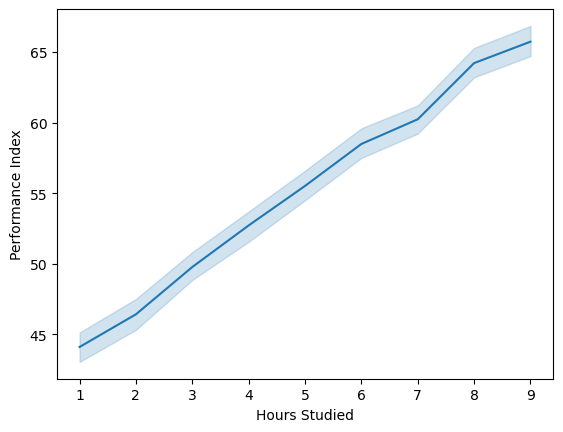

In [8]:
sns.lineplot(df,x=df['Hours Studied'], y=df['Performance Index']) #Bivariate analysis


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


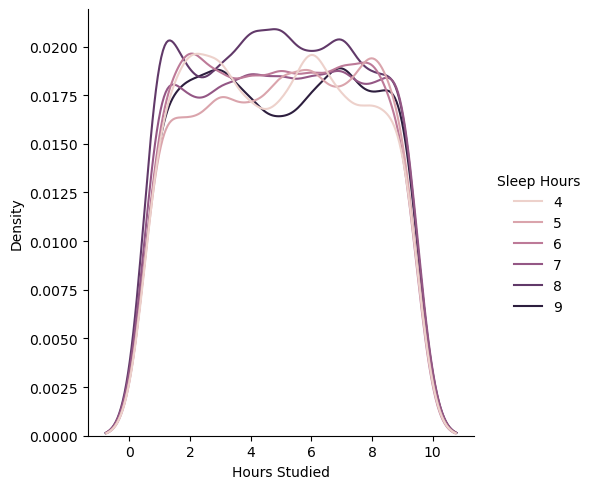

In [9]:
sns.displot(df,x='Hours Studied' ,hue='Sleep Hours',kind='kde')
#bivariate analysis

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

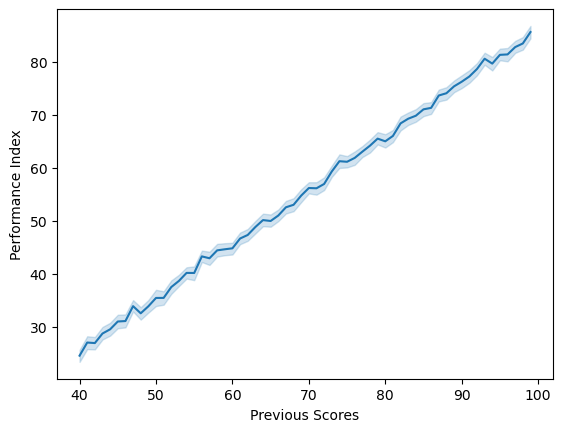

In [10]:
sns.lineplot(df,x=df['Previous Scores'], y=df['Performance Index'])

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

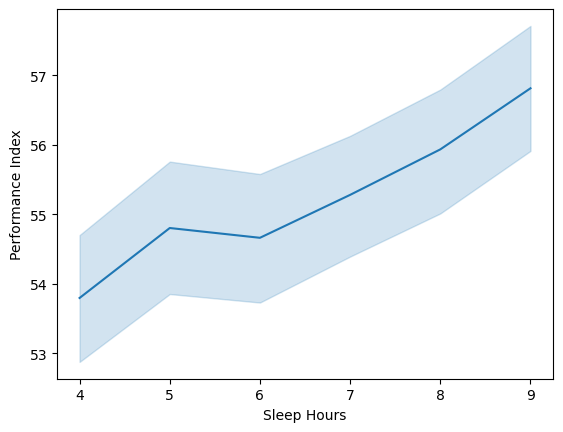

In [11]:
sns.lineplot(df,x=df['Sleep Hours'], y=df['Performance Index'])

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

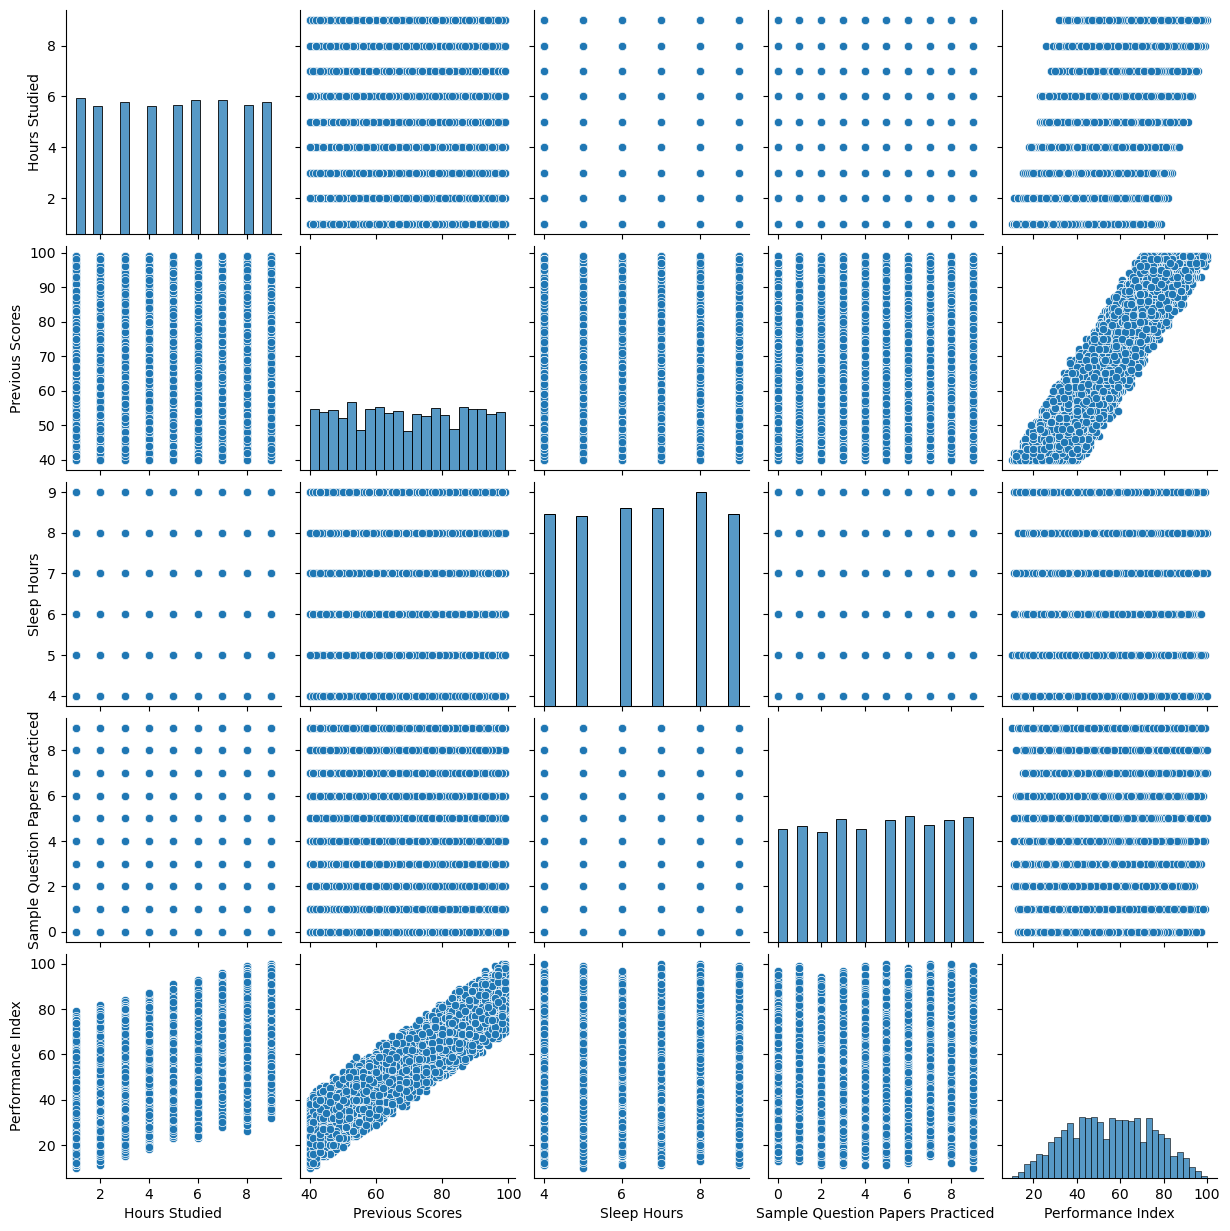

In [12]:
sns.pairplot(df)

## Label encoding

In [14]:
label_encoder = LabelEncoder()

In [15]:
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

In [16]:
df.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0


In [17]:
x = df.iloc[:,0:1]  #all the rows and only first column

In [18]:
x.shape

(10000, 1)

In [19]:
x.sample(3)

,Hours Studied
8566,4
7728,4
8508,7


In [20]:
y = df.iloc[:,-1]

In [21]:
y.shape

(10000,)

In [22]:
y.sample(3)

2322    85.0
8008    42.0
8162    40.0
Name: Performance Index, dtype: float64

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =0)

In [24]:
x_test.shape, y_test.shape

((2000, 1), (2000,))

In [25]:
x_train.shape, y_train.shape

((8000, 1), (8000,))

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
x_train.shape, y_pred.shape

((8000, 1), (2000,))

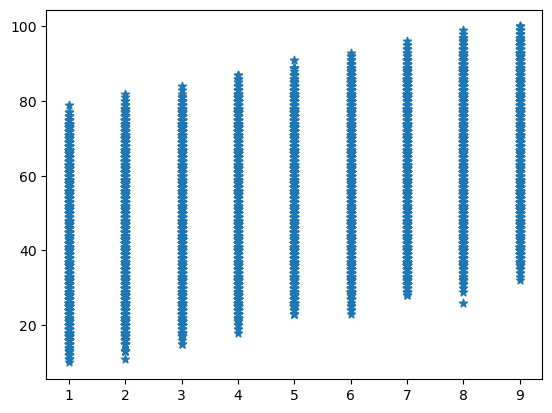

In [30]:
plt.scatter(x=df['Hours Studied'], y=df['Performance Index'], marker = '*')

In [31]:
mean_absolute_error(y_test, y_pred)

14.88202462644476

In [32]:
mean_squared_error(y_test, y_pred)

300.0411017393495

In [33]:
rsquare = r2_score(y_test, y_pred)
rsquare

0.1280470473288079

In [34]:
n = len(df)
k = x.shape[1]  #k = len(x.columns)


In [35]:
adjusted_r_squared = 1 - (1- rsquare) * (n-1) / (n-k-1)
print(f"Adjusted R-squared:",adjusted_r_squared)

Adjusted R-squared: 0.12795983459099314


In [36]:
x = df.iloc[: ,1:2]
y = df.iloc[: ,-1]

In [37]:
x

,Previous Scores
0,99
1,82
2,51
3,52
4,75
...,...
9995,49
9996,64
9997,83
9998,97


In [38]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [77]:
model.intercept_

41.091372027184676

In [79]:
model.coef_

array([2.82005292])

In [81]:
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_}')

Intercept: 41.091372027184676
Slope: [2.82005292]


In [83]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [89]:
import numpy as np
importances = model.coef_

feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Absolute Coefficient': np.abs(importances)}).sort_values(by='Absolute Coefficient',ascending = False)
print(feature_importance_df)

           Feature  Absolute Coefficient
0  Previous Scores              2.820053


In [91]:
score = cross_val_score(model,x,y,cv = 5,scoring='r2')

In [93]:
print('R2 score is', score)
print('Mean of scores is', np.mean(score))

R2 score is [0.84093473 0.83026025 0.83833404 0.84333994 0.83387625]
Mean of scores is 0.8373490452588535
